In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from sklearn_extra.cluster import KMedoids
from sklearn.decomposition import PCA

from sklearn.metrics import  silhouette_score
from sklearn import datasets
from scipy.cluster.hierarchy import dendrogram, linkage
from yellowbrick.cluster import SilhouetteVisualizer, KElbowVisualizer


pd.set_option('display.max_columns', None)

import warnings
warnings.simplefilter(action='ignore')

In [2]:
#data = pd.read_csv('data.csv')
data_new = pd.read_csv('data_new.csv')
data_encoded = pd.read_csv('data_encoded.csv')

data_campain = pd.read_csv('data_campain.csv')
num_purchases = pd.read_csv('num_purchases.csv')

data_cluster_analysis = data_new.join(data_campain)
data_cluster_analysis = data_cluster_analysis.join(num_purchases)

# Models

In [3]:
data_encoded.drop(columns ='Dependants', inplace= True) #Dependants were a calculated column for EDA analysis
# Teen and Small children had a significant difference in households' spending amounts, so that is the reason of keeping these columns.

In [4]:
data_campain.drop(columns =['Z_CostContact','Z_Revenue'], inplace= True) #These columns provided zero information as all rows have the same value.


## K-Means with initial choice of data

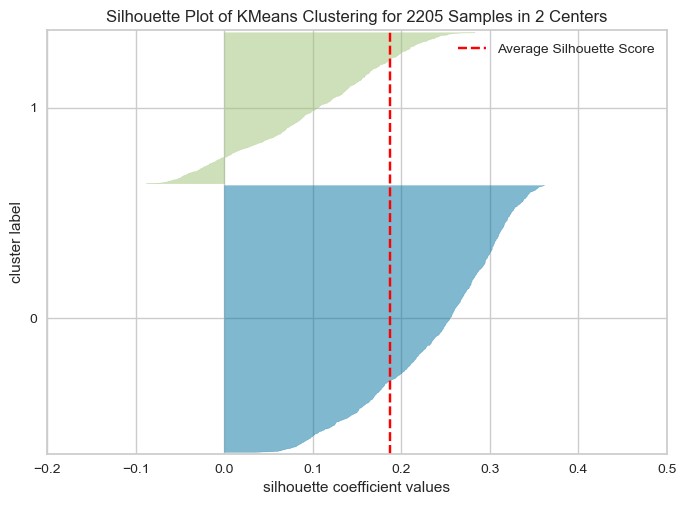

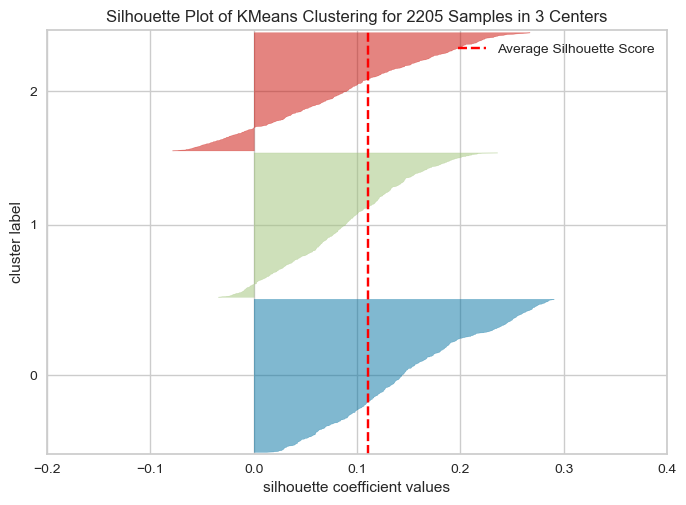

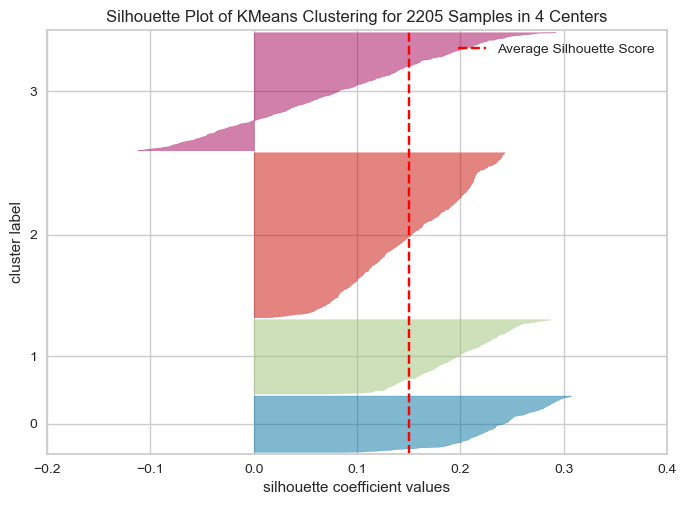

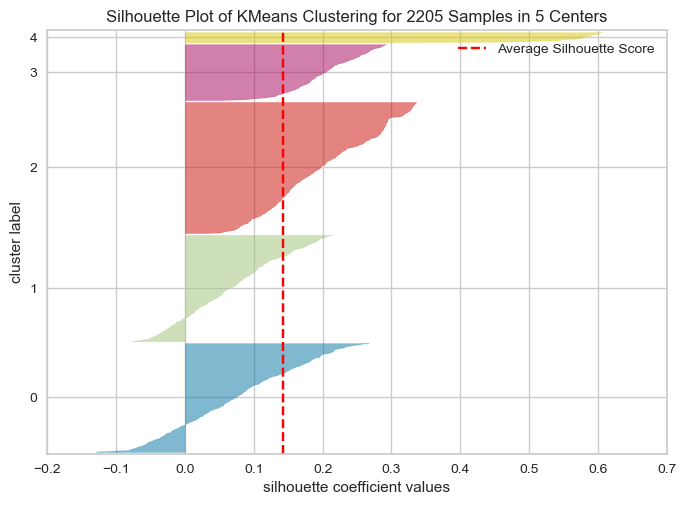

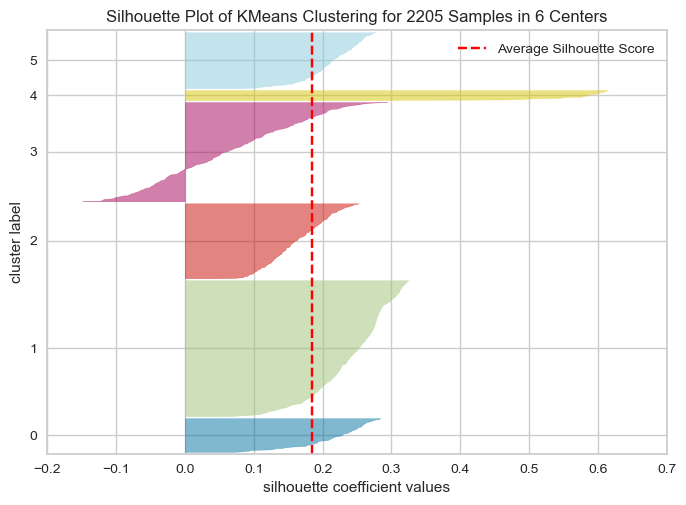

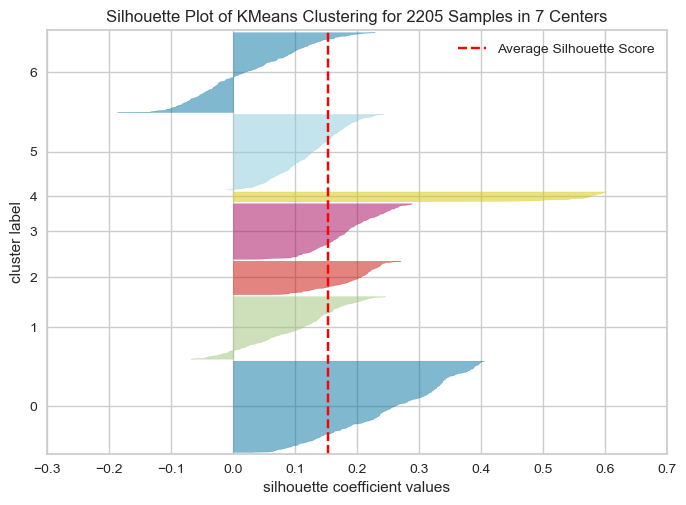

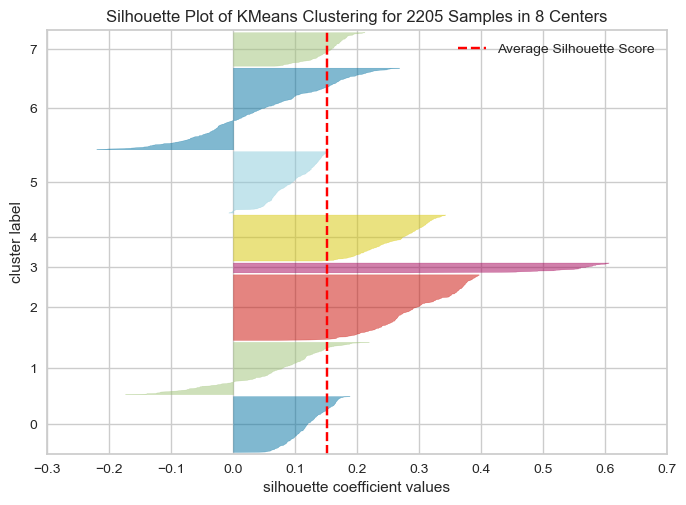

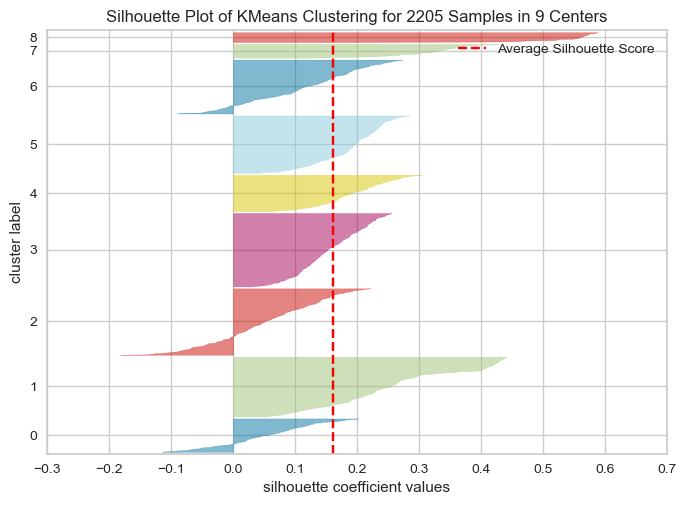

In [5]:
ss = StandardScaler()

'''fit scaler on numeric features'''
ss.fit(data_encoded)

'''scale numeric features'''
data_encoded_scaled = ss.transform(data_encoded)

# sillhouette Score -1 έως 1

sillhouette_list= []
inertia_list= []
for i in range(2,10):
    model_kmeans = KMeans(n_clusters=i, random_state=0,  max_iter=100).fit(data_encoded_scaled)
    visualizer = SilhouetteVisualizer(model_kmeans, colors='yellowbrick')
    visualizer.fit(data_encoded_scaled)
    silhouette_avg = silhouette_score(data_encoded_scaled, model_kmeans.labels_)
    visualizer.poof()
    sillhouette_list.append(silhouette_avg)
    iner = model_kmeans.inertia_
    inertia_list.append(iner)

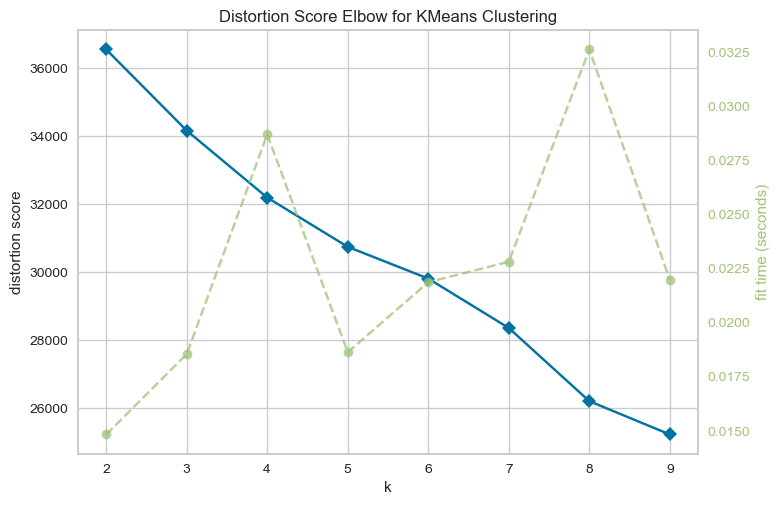

In [6]:
model = KMeans(n_init='auto')
visualizer = KElbowVisualizer(model, k=(2,10), locate_elbow=True)

visualizer.fit(data_encoded_scaled)        # Fit the data to the visualizer
visualizer.poof()        # Draw/show/poof the data
plt.show()


## K-Means initial data & num_purchases data

In [7]:
df_enc_num = data_encoded.join(num_purchases)

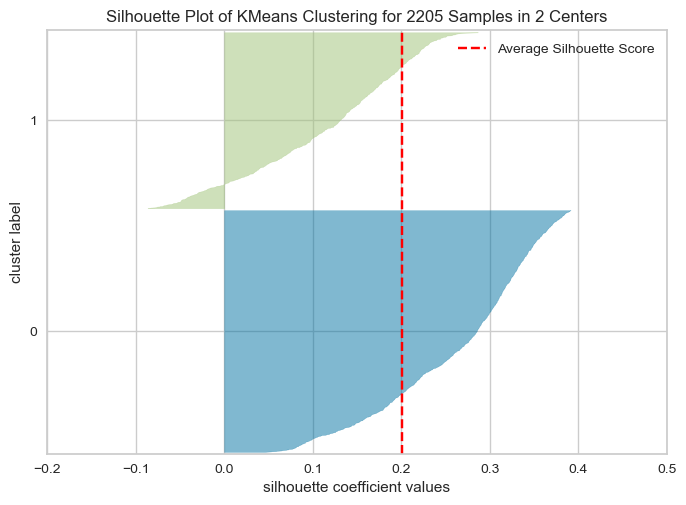

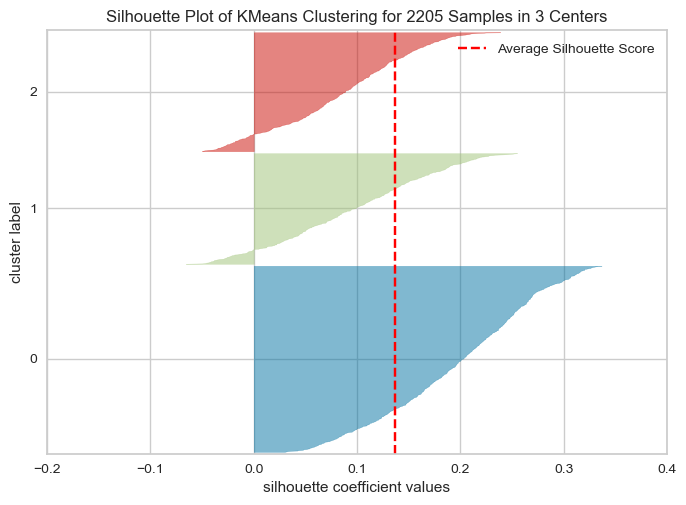

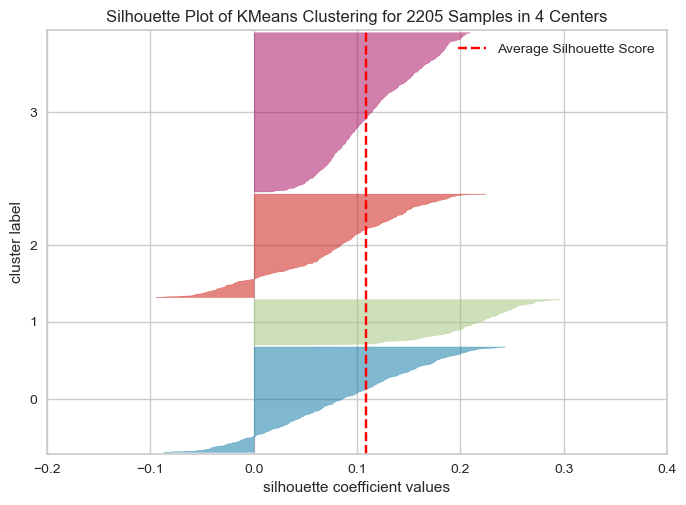

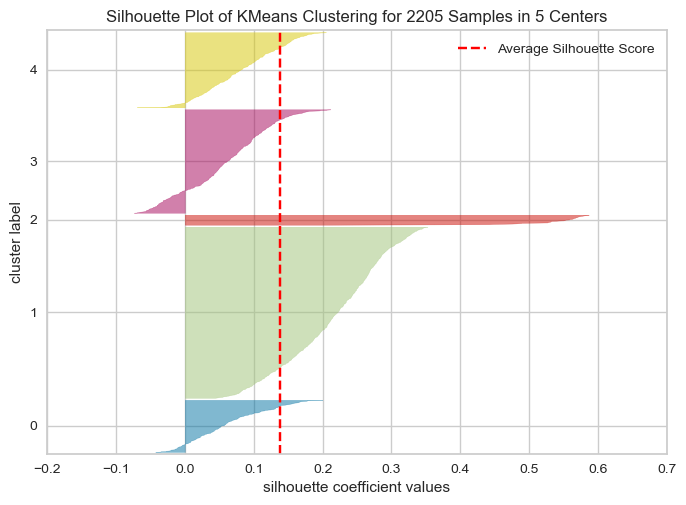

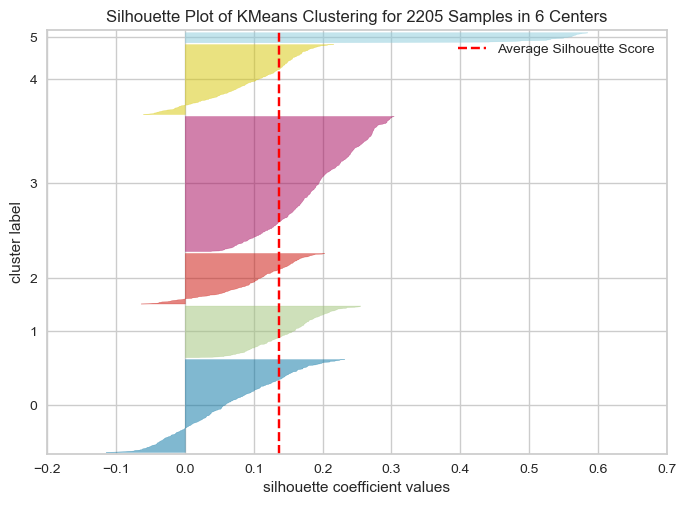

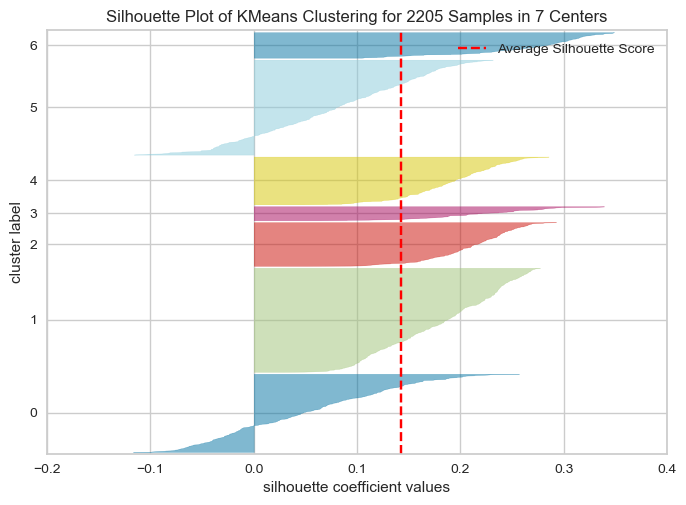

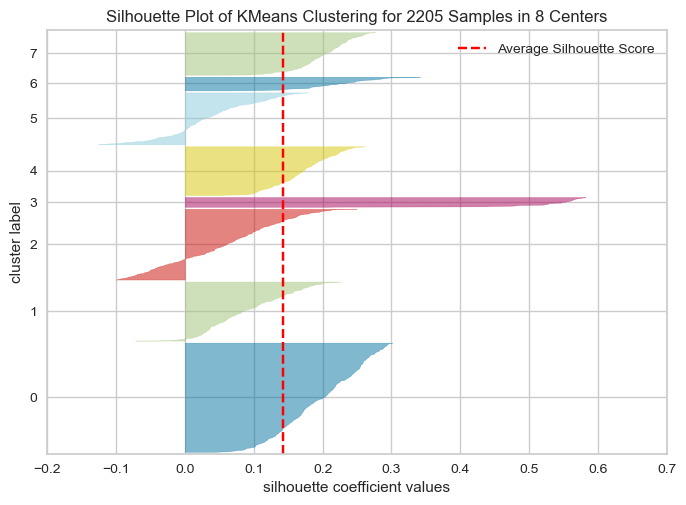

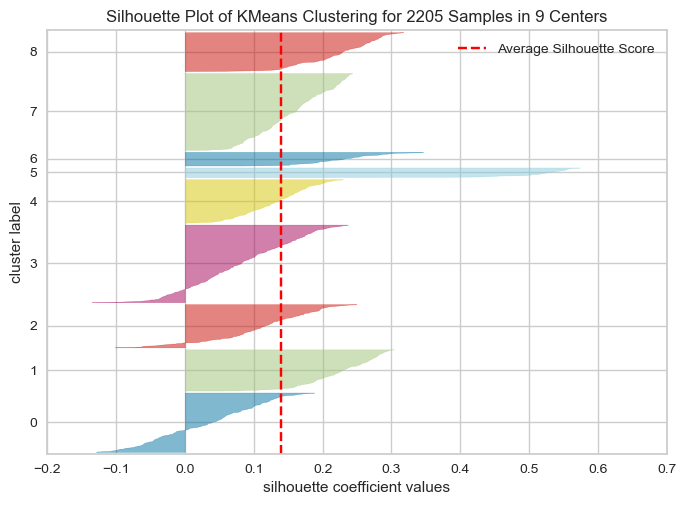

In [8]:
ss = StandardScaler()

'''fit scaler on numeric features'''
ss.fit(df_enc_num)

'''scale numeric features'''
df_enc_num_scaled = ss.transform(df_enc_num)

# sillhouette Score -1 έως 1

sillhouette_list= []
inertia_list= []
for i in range(2,10):
    model_kmeans = KMeans(n_clusters=i, random_state=0,  max_iter=100).fit(df_enc_num_scaled)
    visualizer = SilhouetteVisualizer(model_kmeans, colors='yellowbrick')
    visualizer.fit(df_enc_num_scaled)
    silhouette_avg = silhouette_score(df_enc_num_scaled, model_kmeans.labels_)
    visualizer.poof()
    sillhouette_list.append(silhouette_avg)
    iner = model_kmeans.inertia_
    inertia_list.append(iner)

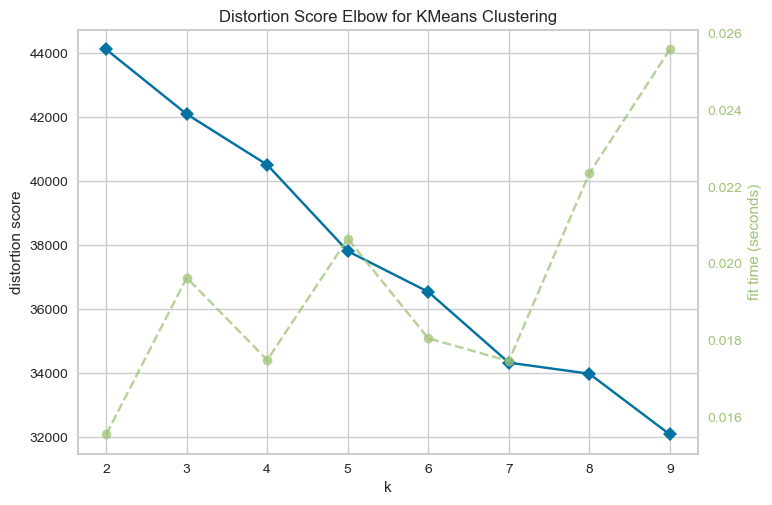

In [9]:
model = KMeans(n_init='auto')
visualizer = KElbowVisualizer(model, k=(2,10), locate_elbow=True)

visualizer.fit(df_enc_num_scaled)        # Fit the data to the visualizer
visualizer.poof()        # Draw/show/poof the data
plt.show()


## K-Means initial data & num_purchases data & data_campaign

In [10]:
df_enc_num_camp = df_enc_num.join(data_campain)

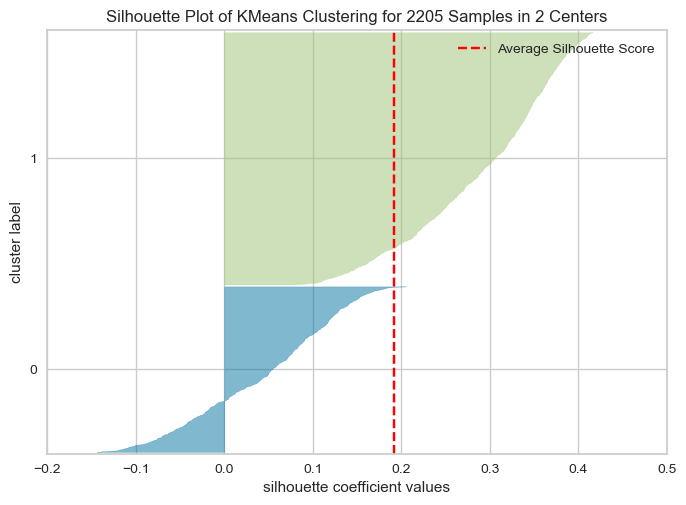

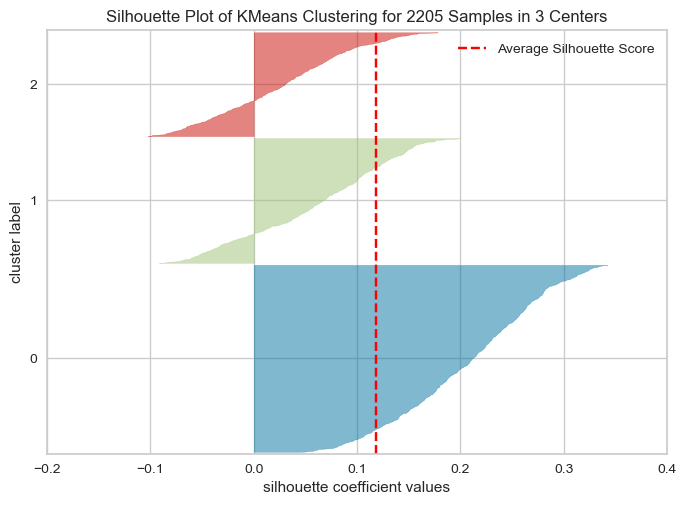

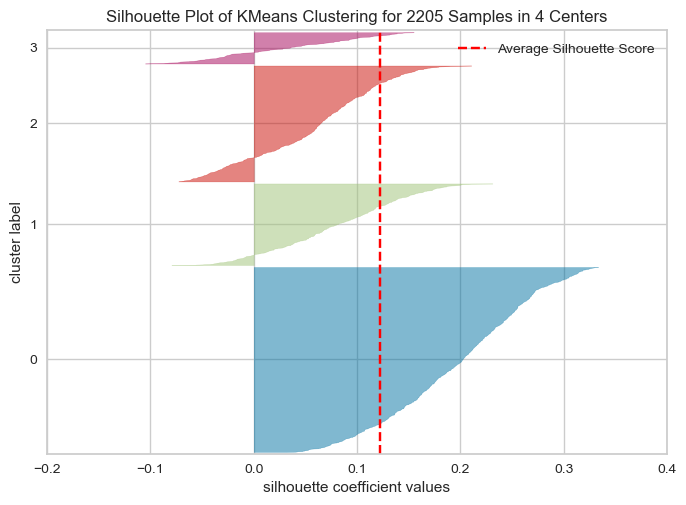

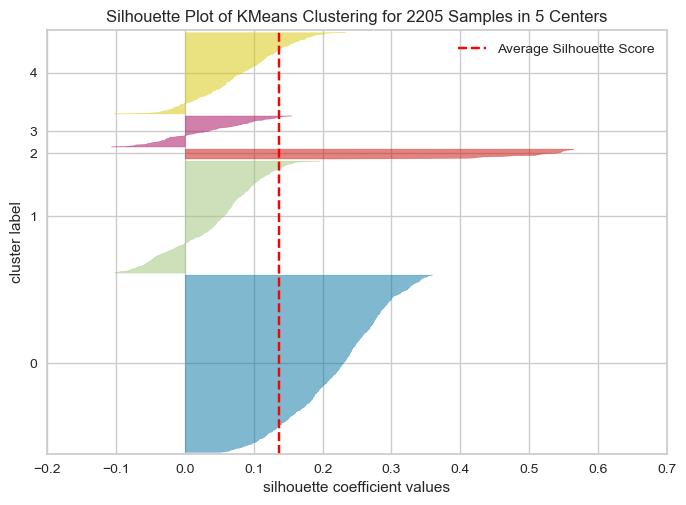

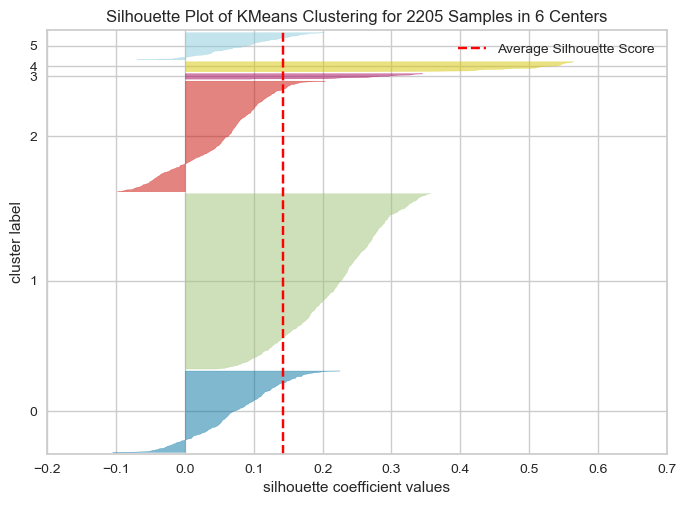

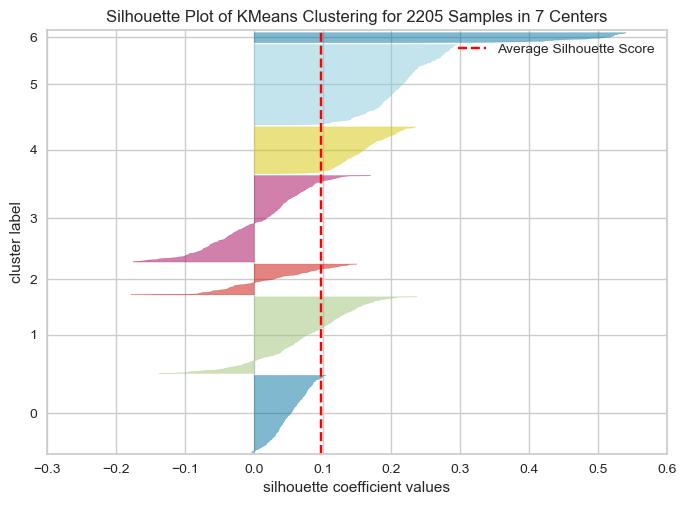

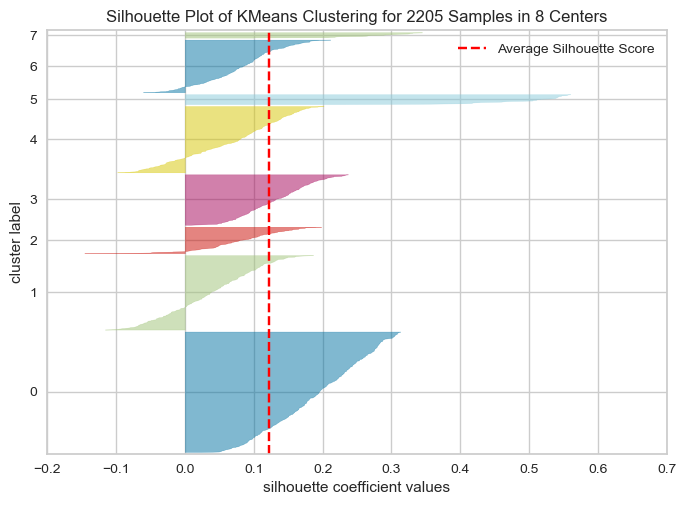

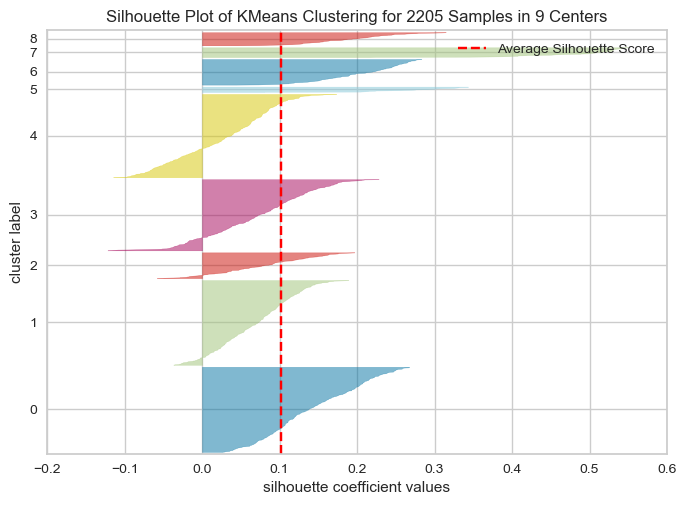

In [11]:
ss = StandardScaler()

'''fit scaler on numeric features'''
ss.fit(df_enc_num_camp)

'''scale numeric features'''
df_enc_num_camp_scaled = ss.transform(df_enc_num_camp)

# sillhouette Score -1 έως 1

sillhouette_list= []
inertia_list= []
for i in range(2,10):
    model_kmeans = KMeans(n_clusters=i, random_state=0,  max_iter=100).fit(df_enc_num_camp_scaled)
    visualizer = SilhouetteVisualizer(model_kmeans, colors='yellowbrick')
    visualizer.fit(df_enc_num_camp_scaled)
    silhouette_avg = silhouette_score(df_enc_num_camp_scaled, model_kmeans.labels_)
    visualizer.poof()
    sillhouette_list.append(silhouette_avg)
    iner = model_kmeans.inertia_
    inertia_list.append(iner)


k_clusters_3 = KMeans(n_clusters=3, random_state=0,  max_iter=100).fit_predict(df_enc_num_camp_scaled)
data_cluster_analysis['k_clusters_3'] = k_clusters_3

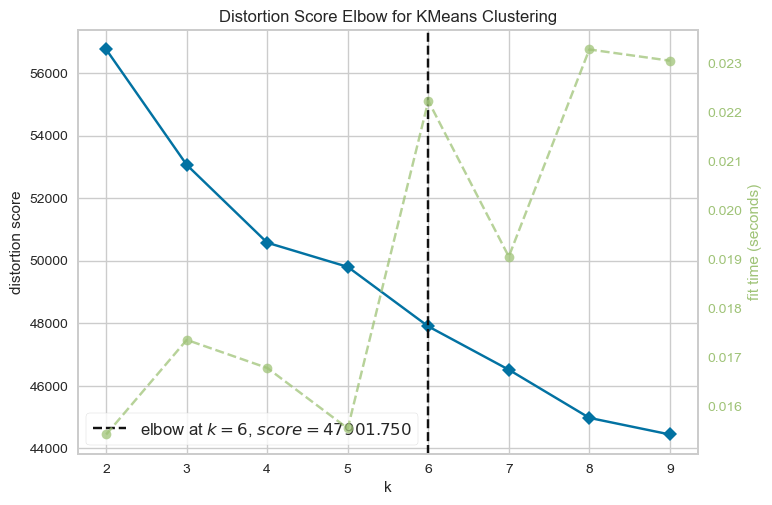

In [12]:
model = KMeans(n_init='auto')
visualizer = KElbowVisualizer(model, k=(2,10), locate_elbow=True)

visualizer.fit(df_enc_num_camp_scaled)        # Fit the data to the visualizer
visualizer.poof()        # Draw/show/poof the data
plt.show()

#plt.plot([x for x in range(2, 10)], inertia_list)

## Agglomerative 

### Agglomerative - (3 clusters / ward)

In [13]:
model = AgglomerativeClustering(n_clusters=3, linkage='ward')

model.fit_predict(data_encoded_scaled)

'''attribute clusters to customers'''
y_hier = model.labels_
y_hier_data_encoded_scaled = pd.DataFrame(y_hier)
y_hier_data_encoded_scaled.rename({0: 'cluster'}, axis=1, inplace=True)

In [14]:
y_hier_data_encoded_scaled.cluster.value_counts()

cluster
0    1381
1     520
2     304
Name: count, dtype: int64

### Agglomerative & num_purchases - (3 clusters / ward)

In [15]:
model = AgglomerativeClustering(n_clusters=3, linkage='ward')

model.fit_predict(df_enc_num_scaled)

'''attribute clusters to customers'''
y_hier = model.labels_
y_hier_data_encoded_scaled = pd.DataFrame(y_hier)
y_hier_data_encoded_scaled.rename({0: 'cluster'}, axis=1, inplace=True)
y_hier_data_encoded_scaled.cluster.value_counts()

cluster
0    973
1    737
2    495
Name: count, dtype: int64

### Agglomerative & num_purchases & data_campaign - (3 clusters / ward)

In [16]:
model = AgglomerativeClustering(n_clusters=3, linkage='ward')

model.fit_predict(df_enc_num_camp_scaled)

'''attribute clusters to customers'''
y_hier = model.labels_
y_hier_data_encoded_scaled = pd.DataFrame(y_hier)
y_hier_data_encoded_scaled.rename({0: 'cluster'}, axis=1, inplace=True)
y_hier_data_encoded_scaled.cluster.value_counts()


cluster
1    1155
0     531
2     519
Name: count, dtype: int64

## DBSCAN - multiple experiments

In [18]:
# Create DBSCAN model
model = DBSCAN(eps=2, min_samples=50)

# Fit and predict
y_dbscan = model.fit_predict(df_enc_num_camp_scaled)

# Attribute clusters to customers
y_dbscan_data_encoded_scaled = pd.DataFrame(y_dbscan, columns=['cluster'])

# Display cluster counts
print(y_dbscan_data_encoded_scaled['cluster'].value_counts())

cluster
-1    2120
 0      85
Name: count, dtype: int64


In [19]:
# Create DBSCAN model
model = DBSCAN(eps=2, min_samples=50)

# Fit and predict
y_dbscan = model.fit_predict(df_enc_num_camp_scaled)

# Attribute clusters to customers
y_dbscan_data_encoded_scaled = pd.DataFrame(y_dbscan, columns=['cluster'])

# Display cluster counts
print(y_dbscan_data_encoded_scaled['cluster'].value_counts())

cluster
-1    2120
 0      85
Name: count, dtype: int64


In [20]:
# Create DBSCAN model
model = DBSCAN(eps=3, min_samples=50)

# Fit and predict
y_dbscan = model.fit_predict(df_enc_num_camp_scaled)

# Attribute clusters to customers
y_dbscan_data_encoded_scaled = pd.DataFrame(y_dbscan, columns=['cluster'])

# Display cluster counts
print(y_dbscan_data_encoded_scaled['cluster'].value_counts())

cluster
-1    1614
 1     231
 0     134
 2     107
 3      67
 4      52
Name: count, dtype: int64


## KMedoids - 4 clusters (tried also 3)

In [21]:
# Initialize KMedoids model
kmedoids = KMedoids(n_clusters=4, random_state=42)

# Fit the model and predict clusters
y_kmedoids = kmedoids.fit_predict(data_encoded_scaled)

# Create a DataFrame with cluster assignments
y_kmedoids_data = pd.DataFrame(y_kmedoids, columns=['cluster'])

# Display cluster counts
print(y_kmedoids_data['cluster'].value_counts())

cluster
0    595
1    562
2    530
3    518
Name: count, dtype: int64


## KMedoids & num_purchases - 4 clusters (tried also 3)

In [22]:
# Initialize KMedoids model
kmedoids = KMedoids(n_clusters=4, random_state=42)

# Fit the model and predict clusters
y_kmedoids = kmedoids.fit_predict(df_enc_num_scaled)

# Create a DataFrame with cluster assignments
y_kmedoids_data = pd.DataFrame(y_kmedoids, columns=['cluster'])

# Display cluster counts
print(y_kmedoids_data['cluster'].value_counts())

cluster
3    854
1    565
2    406
0    380
Name: count, dtype: int64


## KMedoids & num_purchases & data_campaign - 4 clusters (tried also 3)

In [26]:
# Initialize KMedoids model
kmedoids = KMedoids(n_clusters=4, random_state=42)

# Fit the model and predict clusters
y_kmedoids = kmedoids.fit_predict(df_enc_num_camp_scaled)

# Create a DataFrame with cluster assignments
y_kmedoids_data = pd.DataFrame(y_kmedoids, columns=['cluster'])

# Display cluster counts
print(y_kmedoids_data['cluster'].value_counts())

kmedoids = KMedoids(n_clusters=3, random_state=42)
kmed_clusters_3 = kmedoids.fit_predict(df_enc_num_camp_scaled)
data_cluster_analysis['kmed_clusters_3'] = kmed_clusters_3

cluster
3    854
1    565
2    406
0    380
Name: count, dtype: int64


## KMedoids and K-Means in full data with PCA retaining 90%

### KMedoids - PCA

In [27]:
# Apply PCA
pca = PCA(n_components=0.90)  # Retain 90% of the variance
df_pca = pca.fit_transform(df_enc_num_camp_scaled)

# Initialize KMedoids model
kmedoids = KMedoids(n_clusters=4, random_state=42)

# Fit the model and predict clusters
y_kmedoids = kmedoids.fit_predict(df_pca)

# Create a DataFrame with cluster assignments
y_kmedoids_data = pd.DataFrame(y_kmedoids, columns=['cluster'])

# Display cluster counts
print(y_kmedoids_data['cluster'].value_counts())

cluster
0    618
1    578
2    558
3    451
Name: count, dtype: int64


### K-Means - PCA

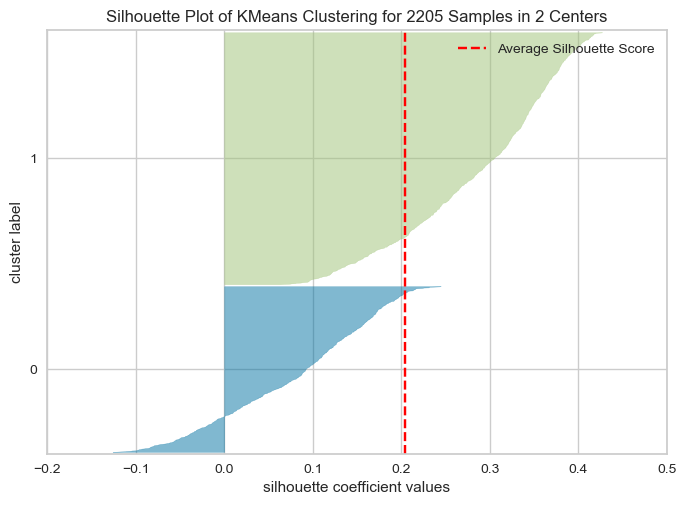

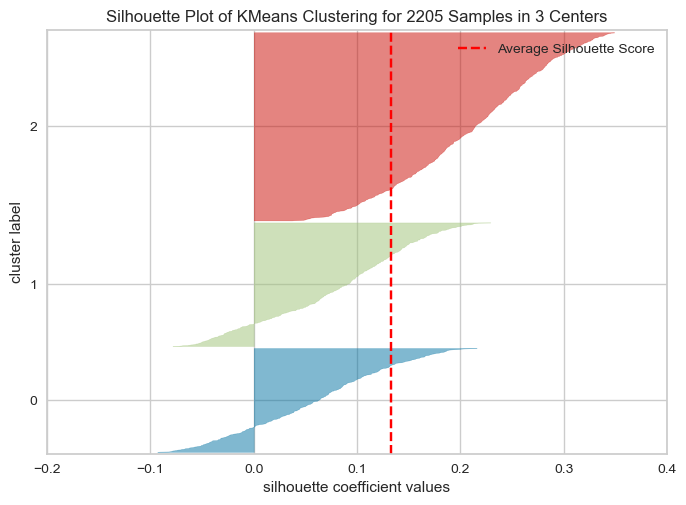

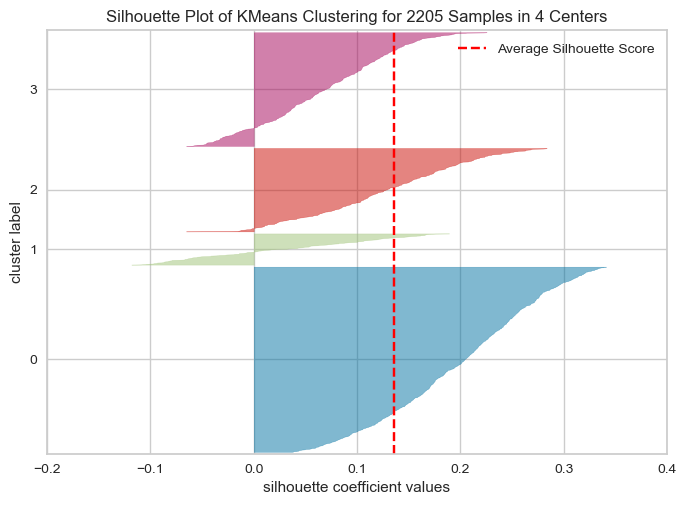

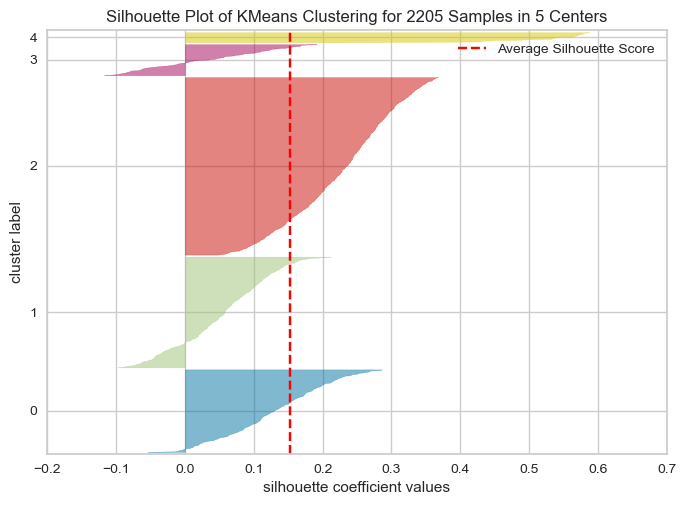

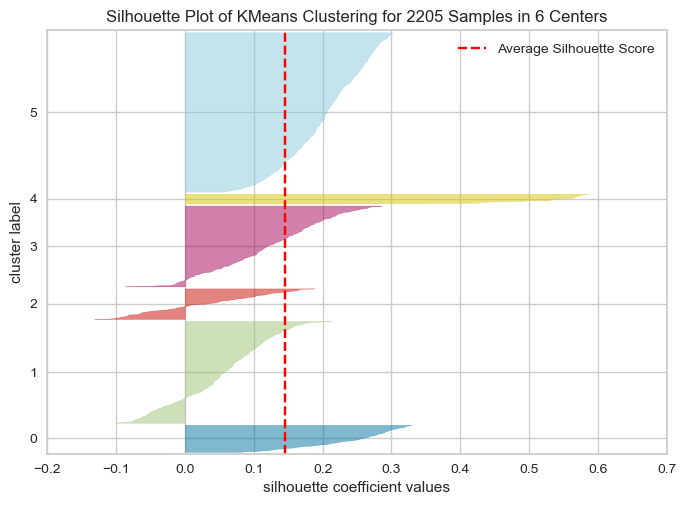

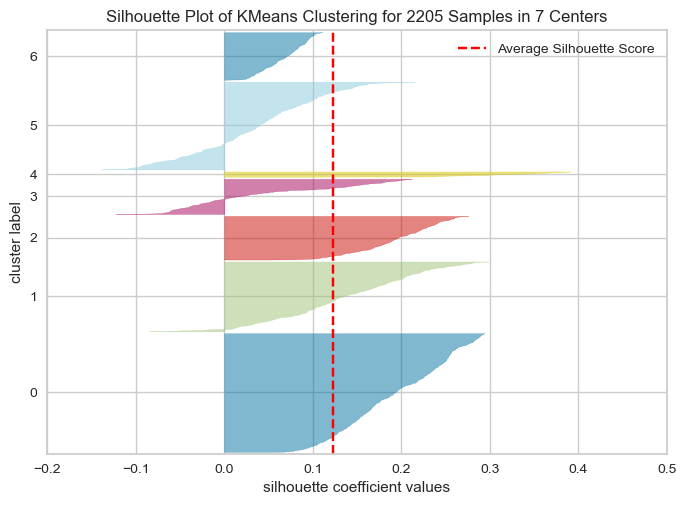

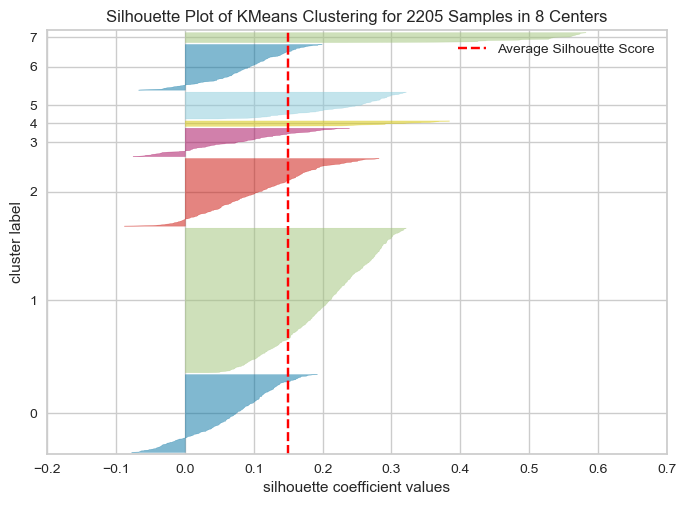

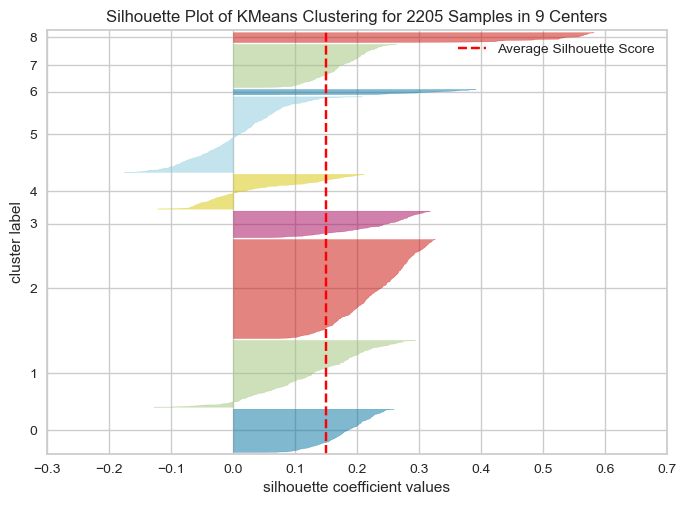

In [28]:
sillhouette_list= []
inertia_list= []
for i in range(2,10):
    model_kmeans = KMeans(n_clusters=i, random_state=0,  max_iter=100).fit(df_pca)
    visualizer = SilhouetteVisualizer(model_kmeans, colors='yellowbrick')
    visualizer.fit(df_pca)
    silhouette_avg = silhouette_score(df_pca, model_kmeans.labels_)
    visualizer.poof()
    sillhouette_list.append(silhouette_avg)
    iner = model_kmeans.inertia_
    inertia_list.append(iner)


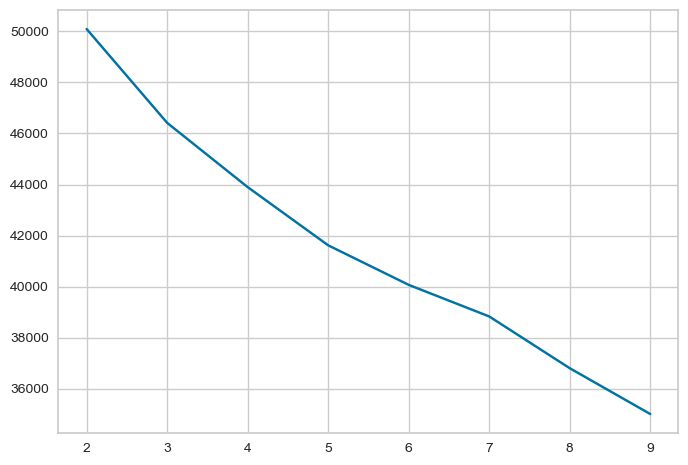

In [29]:
plt.plot([x for x in range(2, 10)], inertia_list)

## Comment

We choose **k-medoids** and **3 clusters** instead of 5 because it was much **easier to intepret** the resulted clusters to business language.

In [34]:
numerical_df = data_cluster_analysis.select_dtypes(exclude='object')

In [36]:
numerical_df.groupby('k_clusters_3').mean()

,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Dependants,Age,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Z_CostContact,Z_Revenue,Response,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,kmed_clusters_3
k_clusters_3,,,,,,,,,,,,,,,,,,,,,,,,,
0,34097.995968,0.815524,0.431452,38.869960,4.871976,22.622984,6.981855,4.951613,15.435484,1.246976,41.881048,0.076613,0.006048,0.000000,0.001008,0.002016,3.0,11.0,0.097782,2.068548,2.083669,0.522177,3.156250,6.536290,0.176411
1,58180.262840,0.216012,0.903323,444.956193,22.722054,133.341390,30.648036,23.506042,58.371601,1.119335,49.888218,0.057402,0.131420,0.013595,0.027190,0.013595,3.0,11.0,0.099698,3.548338,6.170695,3.027190,7.657100,5.557402,1.808157
2,76623.196007,0.039927,0.161525,617.544465,69.290381,468.152450,100.947368,71.263158,77.381125,0.201452,45.147005,0.087114,0.128857,0.274047,0.221416,0.034483,3.0,11.0,0.303085,1.299456,5.181488,6.116152,8.361162,2.849365,1.068966


In [39]:
numerical_df.groupby('kmed_clusters_3').mean()

,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Dependants,Age,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Z_CostContact,Z_Revenue,Response,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,k_clusters_3
kmed_clusters_3,,,,,,,,,,,,,,,,,,,,,,,,,
0,32652.482911,0.853363,0.381477,33.316428,4.900772,21.008820,6.775083,4.846748,14.013230,1.234840,41.555678,0.072767,0.009923,0.000000,0.001103,0.002205,3.0,11.0,0.094818,1.966924,2.001103,0.448732,3.100331,6.626240,0.011025
1,74482.927559,0.047244,0.229921,558.943307,64.694488,413.373228,94.144882,65.374803,71.554331,0.277165,46.475591,0.064567,0.099213,0.211024,0.174803,0.025197,3.0,11.0,0.236220,1.362205,5.072441,5.527559,8.368504,2.877165,1.784252
2,56783.508296,0.256410,0.939668,434.751131,18.895928,131.401207,25.505279,20.859729,57.984917,1.196078,48.634992,0.082956,0.138763,0.039216,0.043741,0.018100,3.0,11.0,0.141780,3.722474,5.989442,2.978884,7.060332,5.876320,0.936652


## Plots & Groupby Analysis 

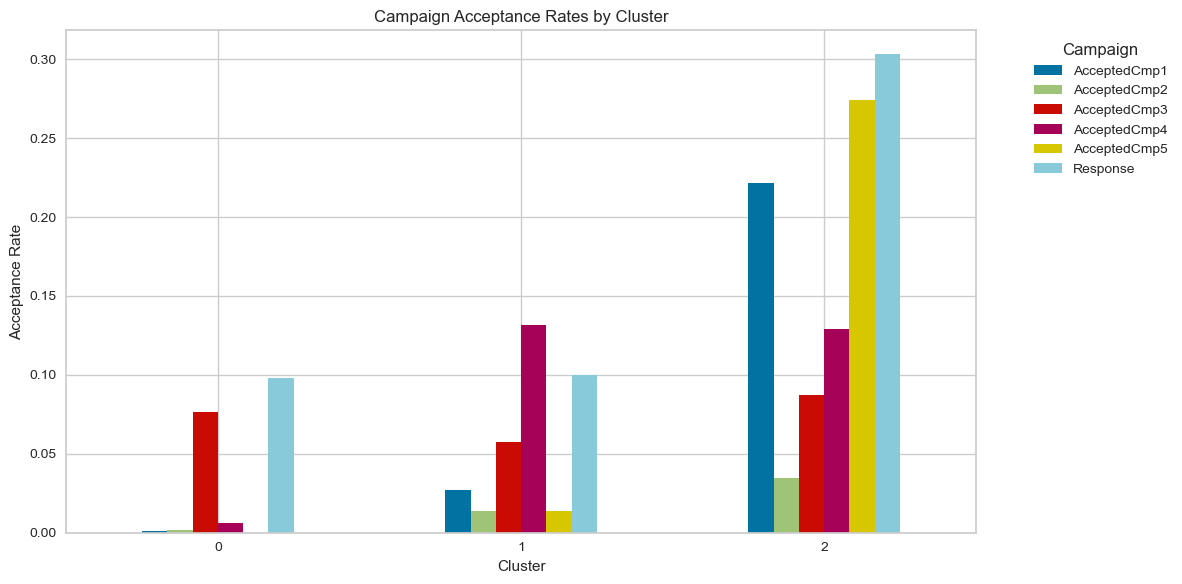

In [77]:
campaigns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
acceptance_rates = data_cluster_analysis.groupby('k_clusters_3')[campaigns].mean()

acceptance_rates.plot(kind='bar', figsize=(12, 6))
plt.title('Campaign Acceptance Rates by Cluster')
plt.xlabel('Cluster')
plt.xticks(rotation = 0)
plt.ylabel('Acceptance Rate')
plt.legend(title='Campaign', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Marital Status Distribution by Cluster')

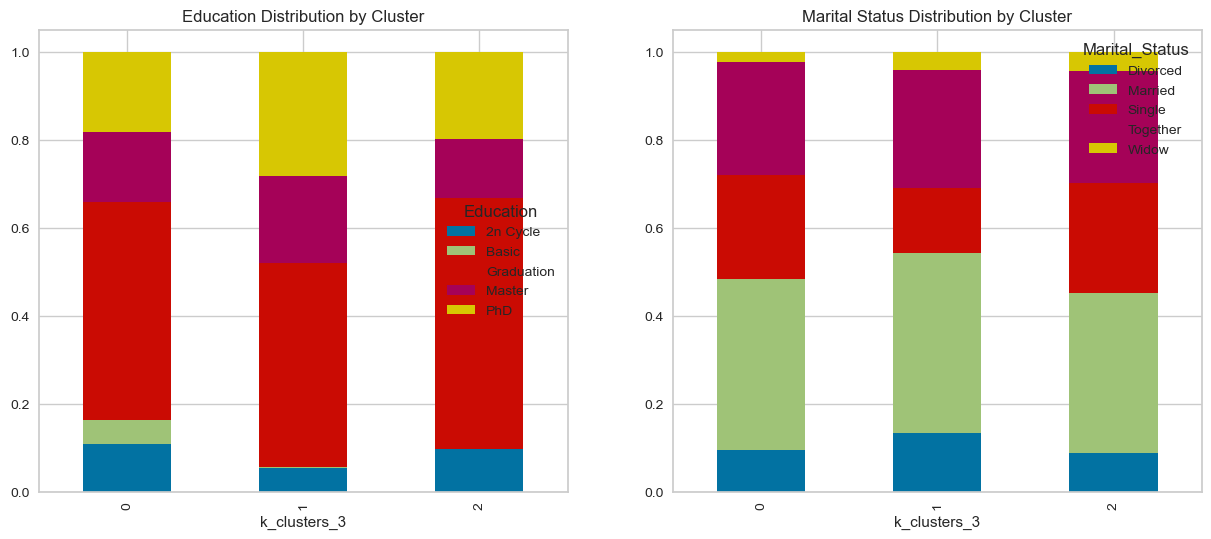

In [56]:
# Education and Marital Status Distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Education distribution
pd.crosstab(data_cluster_analysis['k_clusters_3'], data_cluster_analysis['Education'], normalize='index').plot(
    kind='bar', stacked=True, ax=ax1)
ax1.set_title('Education Distribution by Cluster')

# Marital status distribution
pd.crosstab(data_cluster_analysis['k_clusters_3'], data_cluster_analysis['Marital_Status'], normalize='index').plot(
    kind='bar', stacked=True, ax=ax2)
ax2.set_title('Marital Status Distribution by Cluster')

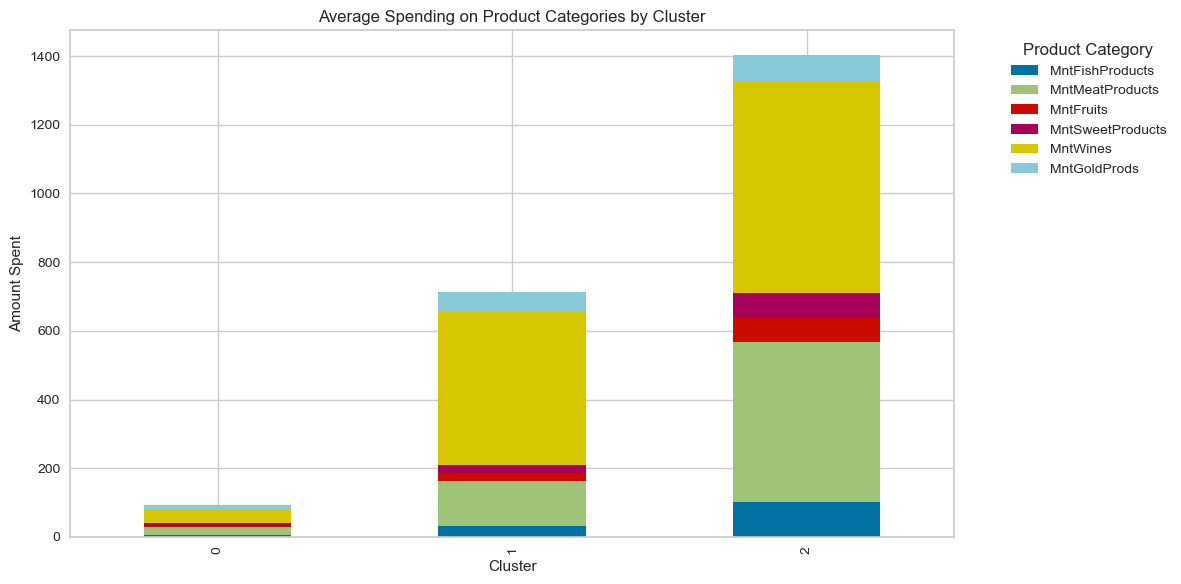

In [57]:
products = ['MntFishProducts', 'MntMeatProducts', 'MntFruits', 'MntSweetProducts', 'MntWines', 'MntGoldProds']
product_spending = data_cluster_analysis.groupby('k_clusters_3')[products].mean()

product_spending.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Average Spending on Product Categories by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Amount Spent')
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

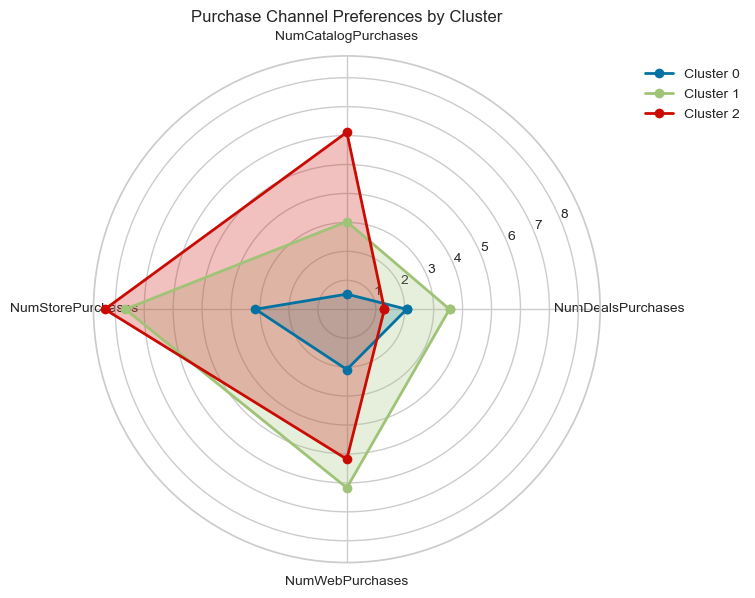

In [58]:
import numpy as np

channels = ['NumDealsPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebPurchases']
channel_data = data_cluster_analysis.groupby('k_clusters_3')[channels].mean()

angles = np.linspace(0, 2*np.pi, len(channels), endpoint=False)
angles = np.concatenate((angles, [angles[0]]))

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(projection='polar'))

for cluster in channel_data.index:
    values = channel_data.loc[cluster].values
    values = np.concatenate((values, [values[0]]))
    ax.plot(angles, values, 'o-', linewidth=2, label=f'Cluster {cluster}')
    ax.fill(angles, values, alpha=0.25)

ax.set_thetagrids(angles[:-1] * 180/np.pi, channels)
ax.set_title('Purchase Channel Preferences by Cluster')
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))

plt.tight_layout()
plt.show()


Text(0, 0.5, 'Average Number of Purchases')

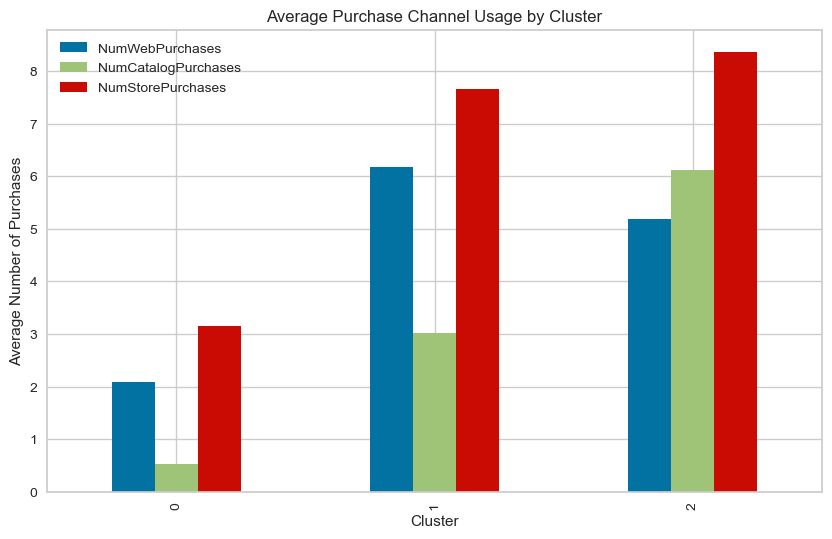

In [59]:
# Purchase channels comparison
purchase_cols = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
purchase_means = data_cluster_analysis.groupby('k_clusters_3')[purchase_cols].mean()

purchase_means.plot(kind='bar', figsize=(10, 6))
plt.title('Average Purchase Channel Usage by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Number of Purchases')


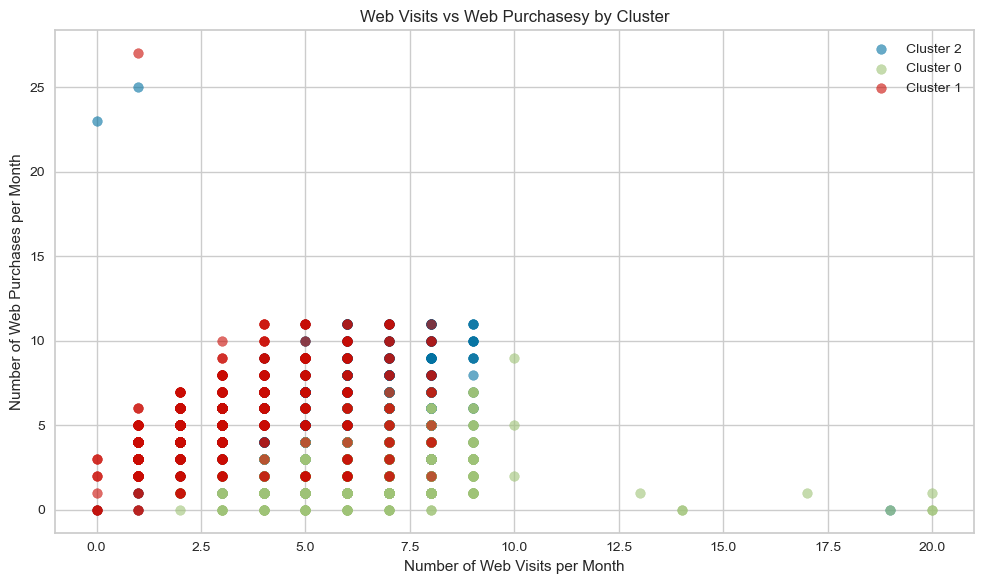

In [60]:
plt.figure(figsize=(10, 6))
for cluster in data_cluster_analysis['k_clusters_3'].unique():
    cluster_data = data_cluster_analysis[data_cluster_analysis['kmed_clusters_3'] == cluster]
    plt.scatter(cluster_data['NumWebVisitsMonth'], cluster_data['NumWebPurchases'], 
                label=f'Cluster {cluster}', alpha=0.6)

plt.title('Web Visits vs Web Purchasesy by Cluster')
plt.xlabel('Number of Web Visits per Month')
plt.ylabel('Number of Web Purchases per Month')
plt.legend()
plt.tight_layout()
plt.show()

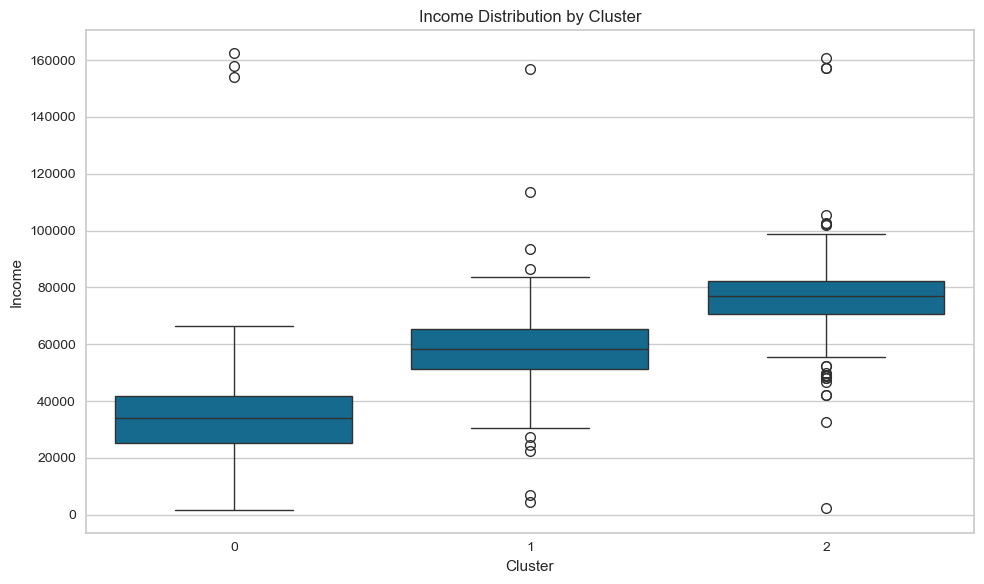

In [61]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='k_clusters_3', y='Income', data=data_cluster_analysis)
plt.title('Income Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Income')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Income vs Purchase Frequency by Cluster')

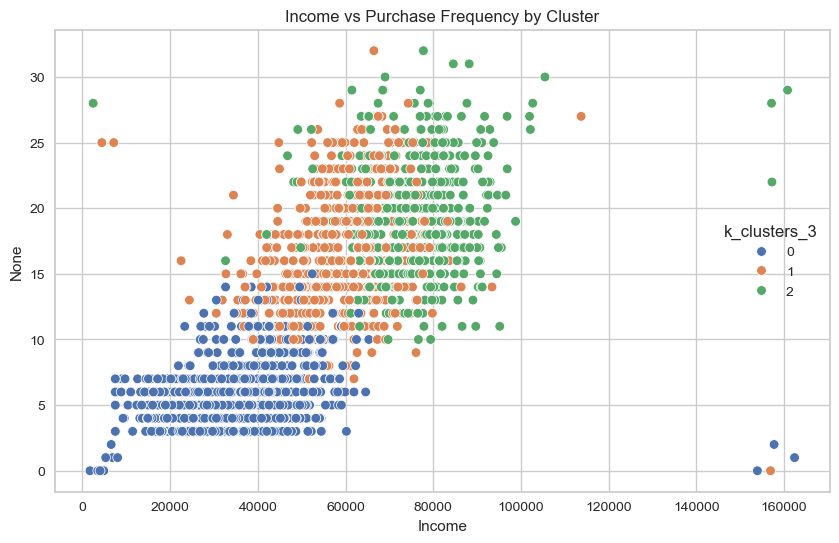

In [62]:
# Recency vs Frequency scatter plot
plt.figure(figsize=(10, 6))
total_purchases = data_cluster_analysis['NumWebPurchases'] + data_cluster_analysis['NumCatalogPurchases'] + data_cluster_analysis['NumStorePurchases']

sns.scatterplot(data=data_cluster_analysis, x='Income', y=total_purchases, 
                hue='k_clusters_3', palette='deep')
plt.title('Income vs Purchase Frequency by Cluster')

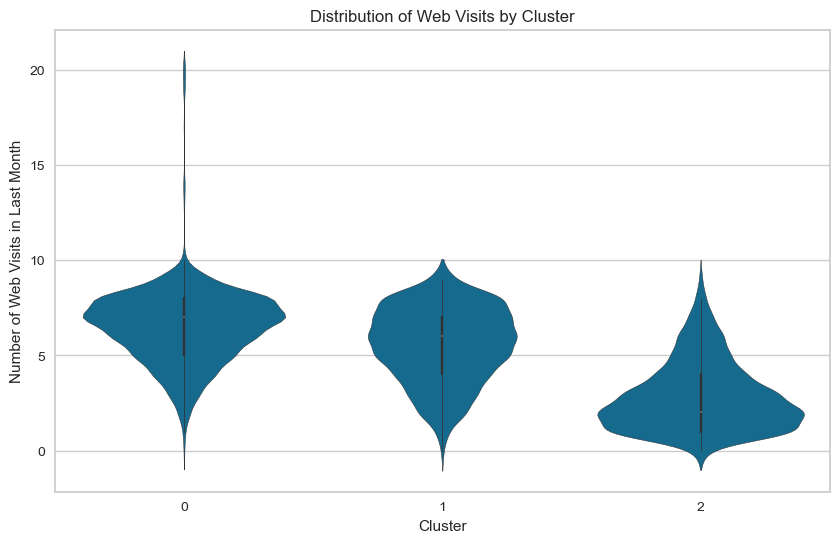

In [63]:

# Create violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='k_clusters_3', y='NumWebVisitsMonth', data=data_cluster_analysis)
plt.title('Distribution of Web Visits by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Web Visits in Last Month')
plt.show()

In [64]:
data_new

,Education,Marital_Status,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Dependants,Age
0,Graduation,Single,58138.0,0,0,635,88,546,172,88,88,0,57
1,Graduation,Single,46344.0,1,1,11,1,6,2,1,6,2,60
2,Graduation,Together,71613.0,0,0,426,49,127,111,21,42,0,49
3,Graduation,Together,26646.0,1,0,11,4,20,10,3,5,1,30
4,PhD,Married,58293.0,1,0,173,43,118,46,27,15,1,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,Graduation,Married,61223.0,0,1,709,43,182,42,118,247,1,47
2201,PhD,Together,64014.0,2,1,406,0,30,0,0,8,3,68
2202,Graduation,Divorced,56981.0,0,0,908,48,217,32,12,24,0,33
2203,Master,Together,69245.0,0,1,428,30,214,80,30,61,1,58


In [66]:
data_cluster_analysis['Total_Spending']=data_cluster_analysis['MntWines']+data_cluster_analysis['MntFruits']+data_cluster_analysis['MntMeatProducts']+data_cluster_analysis['MntFishProducts']+data_cluster_analysis['MntSweetProducts']

In [68]:
x = data_cluster_analysis.groupby('k_clusters_3')['Total_Spending'].mean()

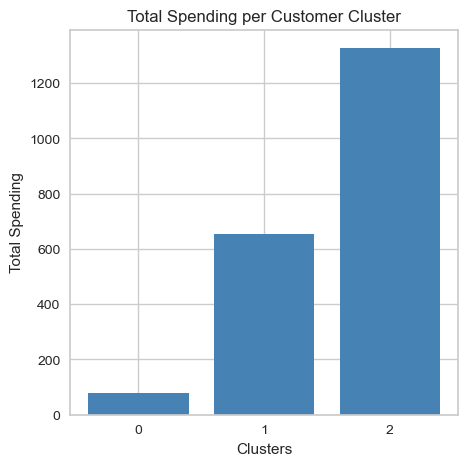

In [69]:
plt.figure(figsize=(5, 5))
plt.bar(x.index, x.values, color='steelblue')  # Use x.index for cluster labels
plt.title('Total Spending per Customer Cluster')
plt.xlabel('Clusters')
plt.ylabel('Total Spending')
plt.xticks(ticks=x.index, labels=[0,1,2])
plt.show()

In [72]:
y = data_cluster_analysis['k_clusters_3'].value_counts()

In [73]:
y

k_clusters_3
0    992
1    662
2    551
Name: count, dtype: int64

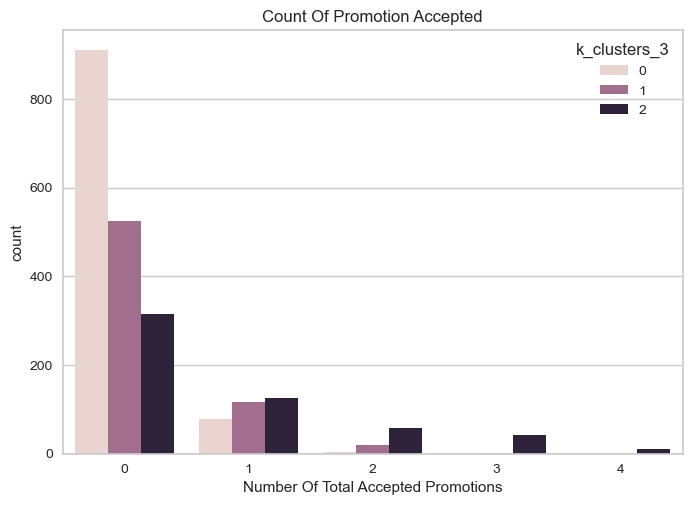

In [79]:
data_cluster_analysis["Total_Promos"] = data_cluster_analysis["AcceptedCmp1"]+ data_cluster_analysis["AcceptedCmp2"]+ data_cluster_analysis["AcceptedCmp3"]+ data_cluster_analysis["AcceptedCmp4"]+ data_cluster_analysis["AcceptedCmp5"]
plt.figure()
pl = sns.countplot(x=data_cluster_analysis["Total_Promos"],hue=data_cluster_analysis["k_clusters_3"])
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

In [80]:
# Filter the DataFrame to include only people who responded to at least one campaign
responded_to_campaigns = data_cluster_analysis[data_cluster_analysis["Total_Promos"] > 0]

# Display the filtered DataFrame
print(responded_to_campaigns)

# Optionally, you can display only specific columns if needed
# For example, to show customer ID and Total_Promos:
# print(responded_to_campaigns[["ID", "Total_Promos"]])

# Get the count of people who responded to at least one campaign
print(f"Number of people who responded to at least one campaign: {len(responded_to_campaigns)}")

       Education Marital_Status   Income  Kidhome  Teenhome  MntWines  \
9            PhD       Together   5648.0        1         1        28   
14           PhD         Single  82800.0        0         0      1006   
17        Master        Married  76995.0        0         1      1012   
21           PhD        Married  58607.0        0         1       867   
27           PhD        Married  84618.0        0         0       684   
...          ...            ...      ...      ...       ...       ...   
2188      Master         Single  75777.0        0         0       712   
2191         PhD         Single  57642.0        0         1       580   
2196  Graduation         Single  11012.0        1         0        24   
2201         PhD       Together  64014.0        2         1       406   
2202  Graduation       Divorced  56981.0        0         0       908   

      MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
9             0                6                1   

In [81]:
456/2240

0.20357142857142857